# Aprendizado Supervisionado - Análise de base de vinhos

## 2. Faça o download da base - esta é uma base real, apresentada no artigo:
>P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

### Entendimento da Base de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wines = pd.read_csv('winequalityN.csv')
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
removed_rows = (len(wines.dropna()) / len(wines)) - 1
print(f"Remover os valores faltantes reduz {abs(removed_rows) * 100:.2f}% da base!")
wines = wines.dropna()

Remover os valores faltantes reduz 0.52% da base!


In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [5]:
wines['opinion'] = [0 if quality <= 5 else 1 for quality in wines['quality']]
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [6]:
wines.type.value_counts()

white    4870
red      1593
Name: type, dtype: int64

### Construindo modelo para vinhos brancos

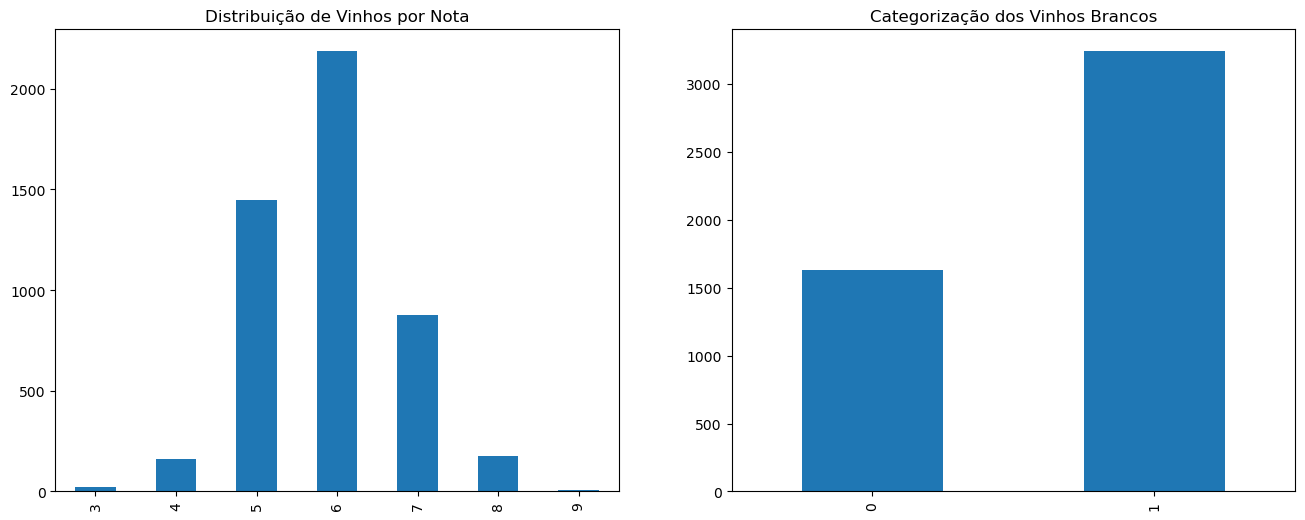

In [7]:
w_wines = wines[wines.type == 'white'].reset_index().drop('index', axis=1)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
ax = plt.subplot(121)
w_wines.quality.value_counts().sort_index(ascending=True).plot.bar()
ax.set_title('Distribuição de Vinhos por Nota')
ax = plt.subplot(122)
w_wines.opinion.value_counts().sort_index(ascending=True).plot.bar()
ax.set_title('Categorização dos Vinhos Brancos');

## 3. Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

In [8]:
w_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,6.855123,0.278071,0.334199,6.394343,0.045771,35.317146,138.340144,0.994026,3.188154,0.489700,10.516772,5.878029,0.665298
std,0.843444,0.100528,0.120915,5.070853,0.021846,17.012967,42.490515,0.002993,0.150902,0.114196,1.231251,0.885699,0.471935
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993735,3.180000,0.470000,10.400000,6.000000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


| **Variável**         |  **Tipo**  | **Valor Médio** | **Desvio Padrão** |
|----------------------|:----------:|:---------------:|:-----------------:|
| type                 | Categórica |        -        |         -         |
| fixed acidity        |  Contínua  |       6.85      |        0.84       |
| volatile acidity     |  Contínua  |       0.27      |        0.10       |
| citric acid          |  Contínua  |       0.33      |        0.12       |
| residual sugar       |  Contínua  |       6.39      |        5.07       |
| chlorides            |  Contínua  |       0.04      |        0.02       |
| free sulfur dioxide  |  Contínua  |       35.3      |       17.01       |
| total sulfur dioxide |  Contínua  |      138.34     |       42.49       |
| density              |  Contínua  |       0.99      |       0.0029      |
| pH                   |  Contínua  |       3.18      |        0.15       |
| sulphates            |  Contínua  |       0.48      |        0.11       |
| quality              | Categórica |        -        |         -         |
| opinion              | Categórica |        -        |         -         |

## 4. Com a base escolhida:

**Descreva as etapas necessárias para criar um modelo de classificação eficiente:**
- Analisar as correlações entre as variáveis.
- Separar as bases de treino e teste.
- Normalizar as variaveis.
- Treinar os modelos e analisar as métricas aplicando o modelo na base de teste.
- Definir o melhor modelo.

### Libs

In [9]:
import seaborn as sns
import random
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    RocCurveDisplay
)

### EDA

In [10]:
w_wines = w_wines.drop(columns=['type', 'quality'])
features = w_wines.columns.drop('opinion')
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

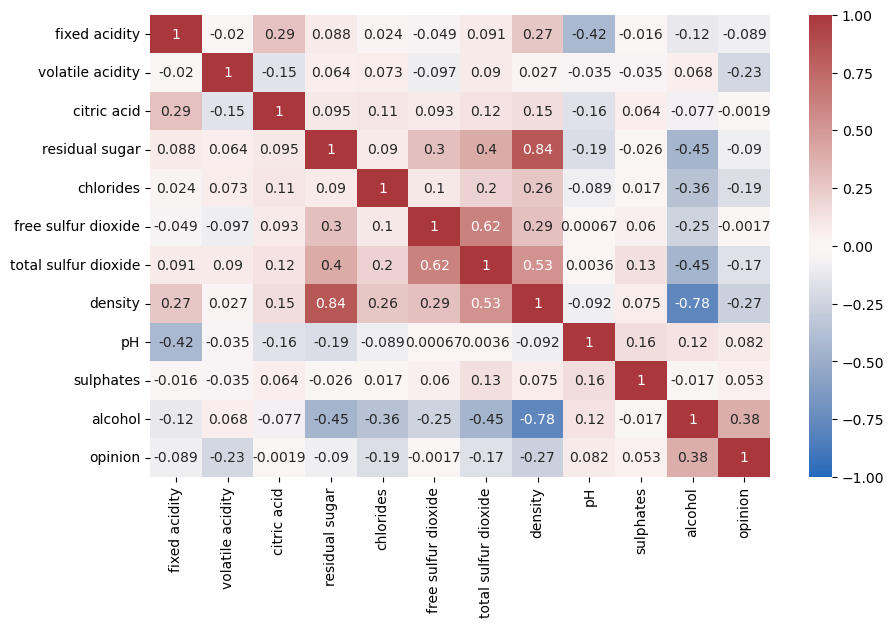

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(w_wines.corr(), vmin=-1, vmax=1, annot=True, ax=ax, cmap='vlag');

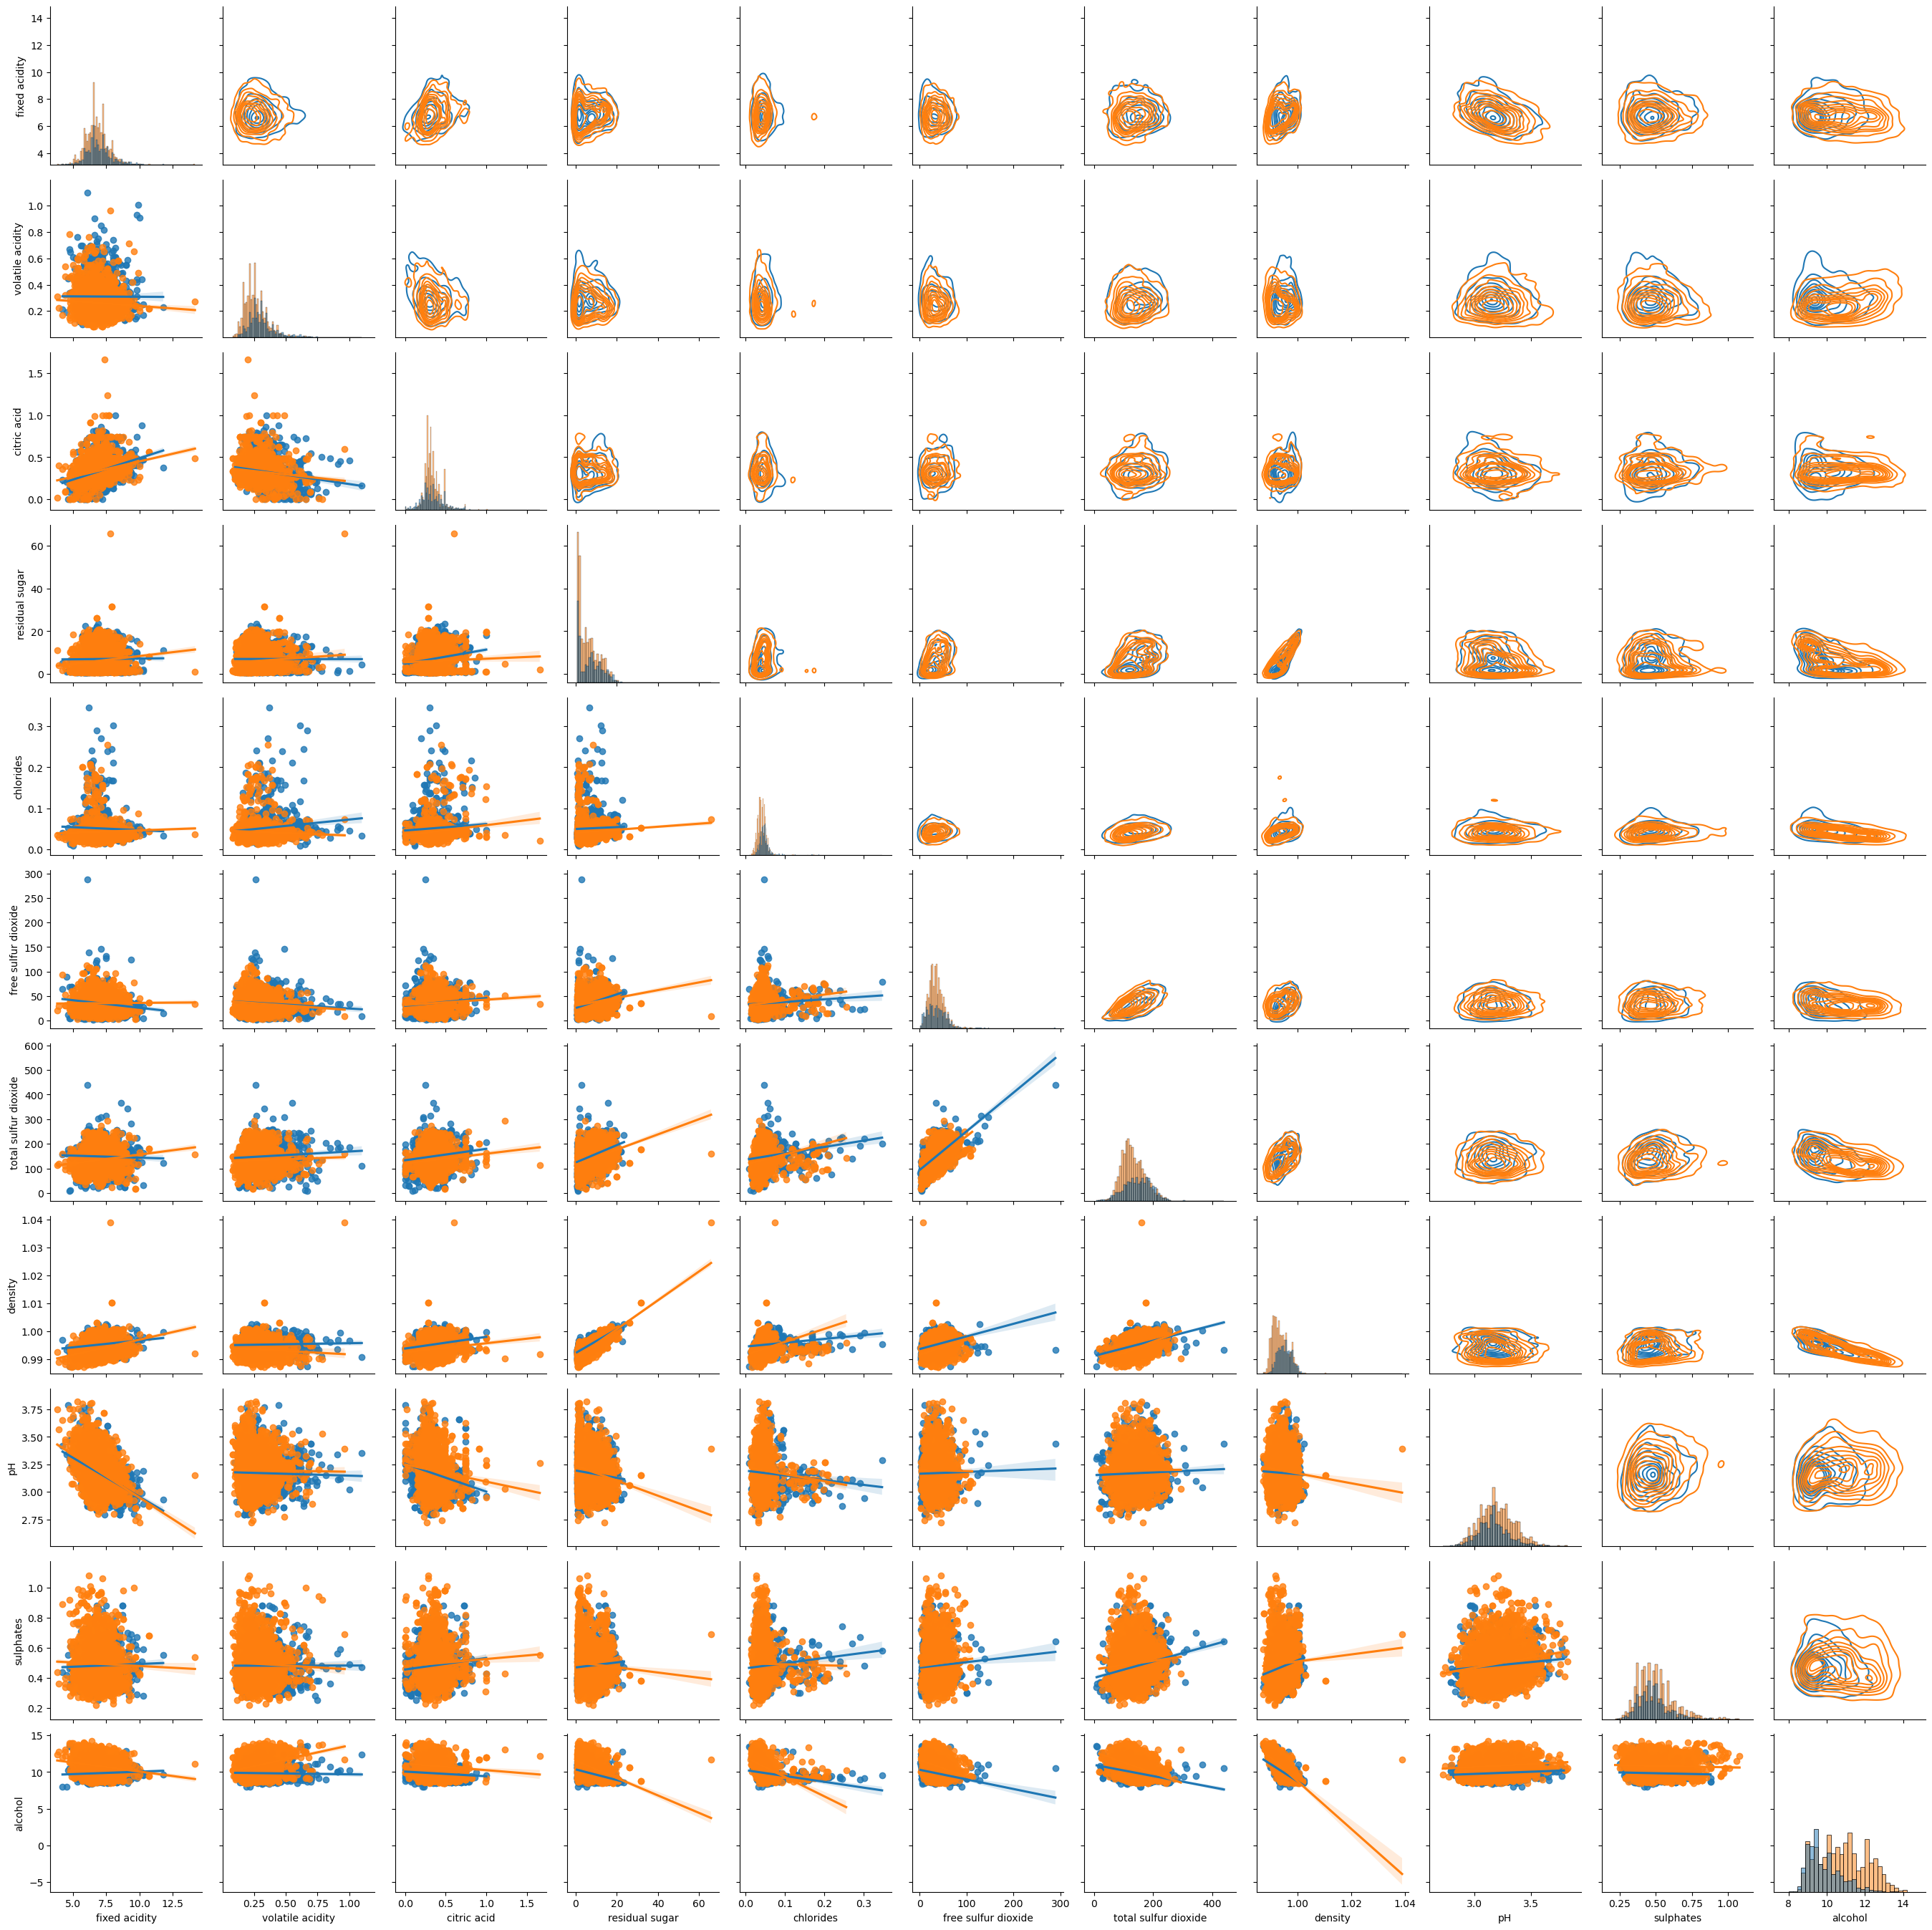

In [12]:
g = sns.PairGrid(w_wines, hue='opinion')
# sns.boxplot(w_wines, x='opinion', y='density')
g.map_lower(sns.regplot)
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot);

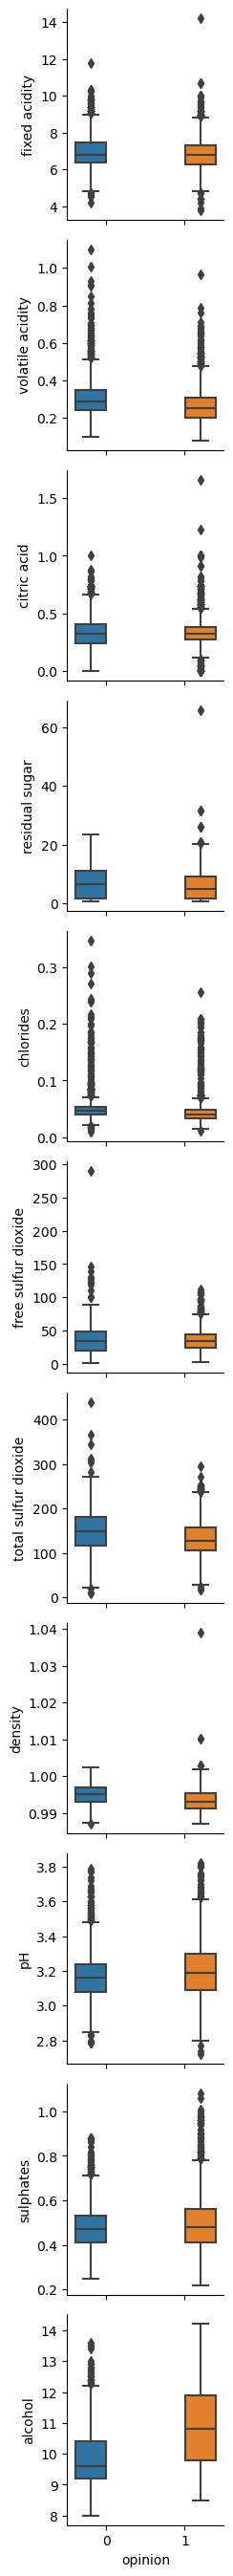

In [13]:
g = sns.PairGrid(w_wines, hue='opinion', x_vars='opinion')
g.map(sns.boxplot);

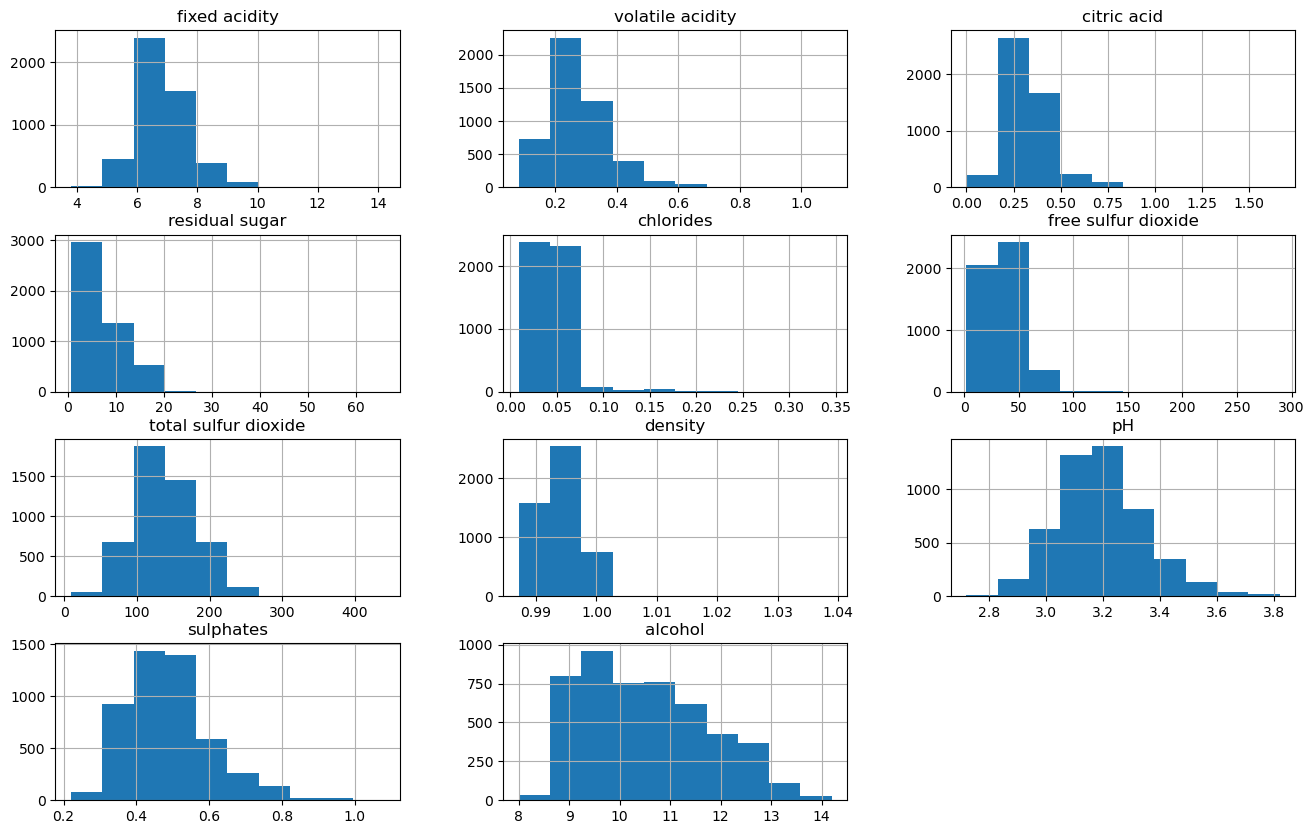

In [14]:
# Analisar distribuição das variáveis
w_wines[features].hist(figsize=(16, 10));

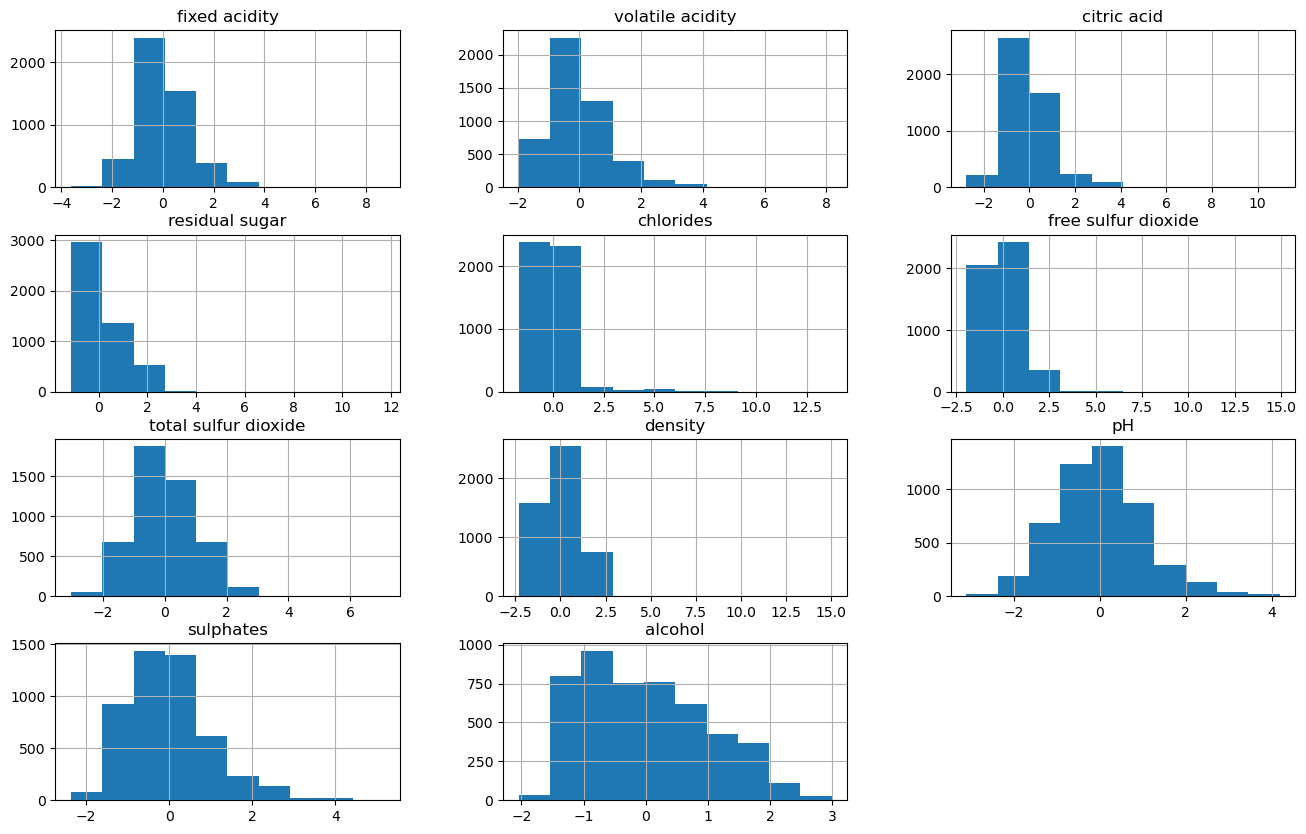

In [15]:
# Escalonar com StandardScaler
df_ss = w_wines.copy()
ss = StandardScaler()
df_ss[features] = ss.fit_transform(w_wines[features])
df_ss[features].hist(figsize=(16,10));

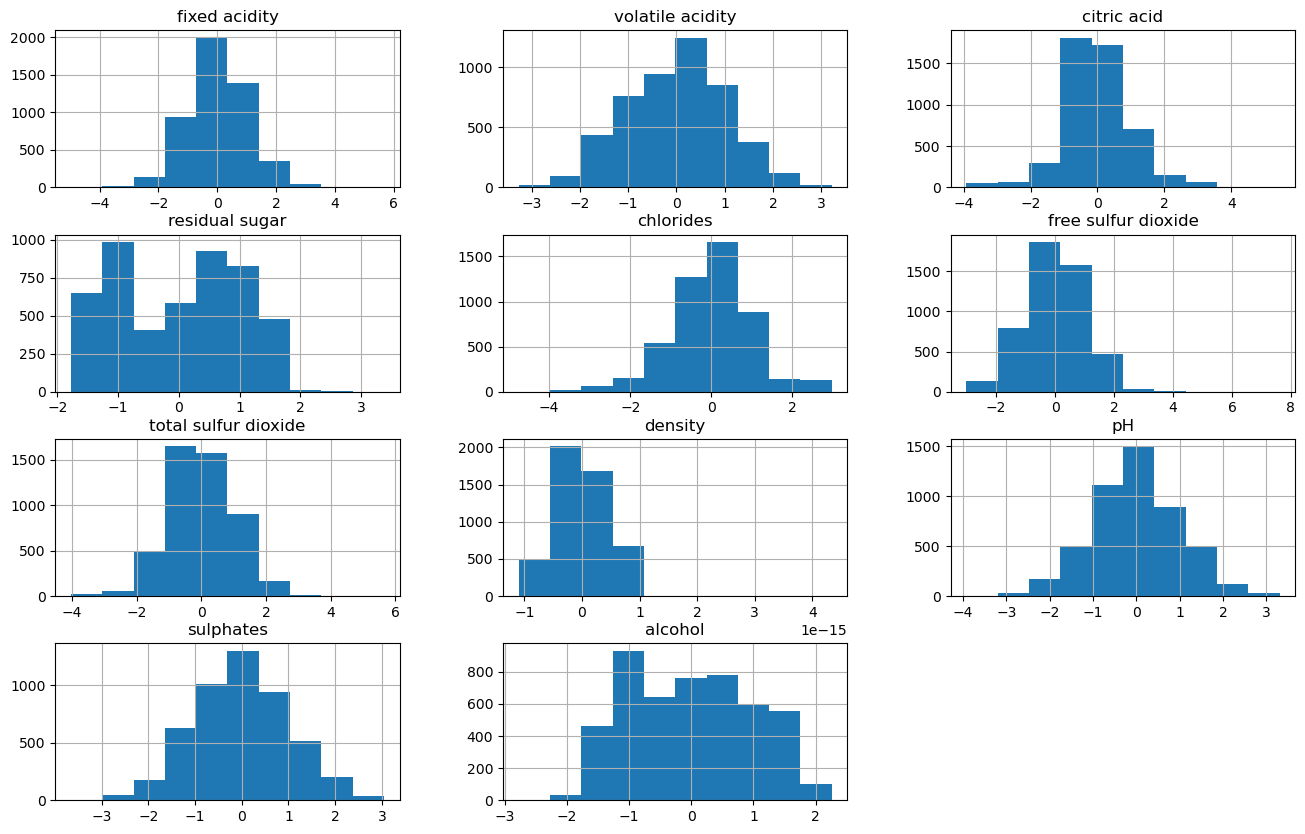

In [16]:
# Escalonar com PowerTransformer
df_pt = w_wines.copy()
pt = PowerTransformer()
df_pt[features] = pt.fit_transform(w_wines[features])
df_pt[features].hist(figsize=(16,10));

### Construção do modelo

In [17]:
class TrainModelCV:

    def __init__(self, classifier, X, y, scaler_model = PowerTransformer, cv_splits=10,
                 test_size = 0.2, random_state = 42, stratify = None, **model_kwargs) -> None:
        '''Class used to train different classifiers of Supervised Machine Learning Models. Using Cross Validation tuning strategies.'''

        # Define random seeds to keep same results when shuffling
        random.seed(random_state)
        np.random.seed(random_state)

        # Split data base into Train and Test
        if not stratify:
            stratify = y

        X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=stratify)

        # Start of Cross Validation splits
        cv = StratifiedKFold(n_splits=cv_splits, random_state=random_state, shuffle=True)

        cv_data = []
        for fold, (train_i, val_i) in enumerate(cv.split(X_train_cv, y_train_cv)):
            # Split train and validation bases for each fold
            X_train = X.loc[train_i]
            X_val = X.loc[val_i]
            y_train = y.loc[train_i]
            y_val = y.loc[val_i]

            # Scale independent variables
            scaler = scaler_model()
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)

            # Train Model
            model = classifier(**model_kwargs, random_state=random_state)
            model.fit(X_train_scaled, y_train)
            y_val_pred = model.predict(X_val_scaled)
            y_val_score = model.predict_proba(X_val_scaled)[:,1]
            
            # Analisar métricas do modelo na base de validação
            accuracy = accuracy_score(y_val, y_val_pred)
            precision = precision_score(y_val, y_val_pred)
            recall = recall_score(y_val, y_val_pred)
            f1 = f1_score(y_val, y_val_pred)

            # Save results
            fold_data = {
                'fold': fold,
                'model' : model,
                'scaler' : scaler,
                'accuracy' : accuracy,
                'precision' : precision,
                'recall' : recall,
                'f1_score' : f1,
                'y_val' : y_val,
                'y_val_score' : y_val_score
            }
            cv_data.append(fold_data)

        # CV DataFrame
        df = pd.DataFrame(cv_data).set_index('fold')
        
        # Define best model
        best_model_idx = np.argmax(df['f1_score'])
        best_model = df.loc[best_model_idx, 'model']
        best_model_scaler = df.loc[best_model_idx, 'scaler']

        # Define Class' attributes
        self.X_test = X_test
        self.y_test = y_test
        self.cv_df = df
        self.best_model_idx = best_model_idx
        self.best_model = best_model
        self.best_model_scaler = best_model_scaler
        self.classifier = classifier.__name__

    def show_folds_metrics(self):
        metrics = ['accuracy', 'precision', 'recall', 'f1_score']
        display(self.cv_df[metrics])

    # Print metrics and standard deviations
    def show_metrics_means(self):
        print("Accuracy Mean: %0.2f +- %0.2f" % (np.mean(self.cv_df['accuracy']), np.std(self.cv_df['accuracy'])))
        print("Precision Mean: %0.2f +- %0.2f" % (np.mean(self.cv_df['precision']), np.std(self.cv_df['precision'])))
        print("Recall Mean: %0.2f +- %0.2f" % (np.mean(self.cv_df['recall']), np.std(self.cv_df['recall'])))
        print("F1 Score Mean: %0.2f +- %0.2f" % (np.mean(self.cv_df['f1_score']), np.std(self.cv_df['f1_score'])))

    # Plot ROC Curve for all folds and the mean ROC
    def plot_cv_ROC(self, figsize=(6,6), ax=None):
        # Define plot area if not given
        if not ax:
            fig, ax = plt.subplots(1, 1, figsize=figsize)
            
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        for fold, row in self.cv_df.iterrows():
            # Plot ROC curve for each fold
            viz = RocCurveDisplay.from_predictions(row['y_val'], row['y_val_score'], name=f"Fold {fold}", ax=ax, alpha=0.3, lw=1)
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)

        # Plot Mean ROC Curve
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)

        ax.plot([0, 1], [0, 1], 'k--', alpha=0.8, lw=1)
        
        ax.plot(mean_fpr, mean_tpr, color="b",  
                label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc), 
                lw=1.5, alpha=0.8)

        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

        ax.fill_between(mean_fpr, tprs_lower, tprs_upper,
            color="lightblue", alpha=0.8,
            label=r"$\pm$ 1 std. dev.")

        ax.set(xlim=[-0.05, 1.05],  ylim=[-0.05, 1.05],
            xlabel="False Positive Rate",  ylabel="True Positive Rate",
            title="Cross-Validation ROC Curve")
        ax.grid()
        ax.legend()

    def apply_best_model(self):
        X_test_scaled = self.best_model_scaler.transform(self.X_test)
        y_pred = self.best_model.predict(X_test_scaled)
        y_score = self.best_model.predict_proba(X_test_scaled)[:,1]
        return y_pred, y_score
    
    # Calculate best model metrics on test data set
    def best_model_metrics(self):
        y_pred, _ = self.apply_best_model()
        
        accuracy = accuracy_score(self.y_test, y_pred)
        precision = precision_score(self.y_test, y_pred)
        recall = recall_score(self.y_test, y_pred)
        f1 = f1_score(self.y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")

        return f1

    # Plot ROC Curve for the test data set
    def plot_test_ROC(self, figsize=(5,5), ax=None):
        _, y_score = self.apply_best_model()

        if not ax:
            fig, ax = plt.subplots(1, 1, figsize=figsize)
        ax.grid()

        RocCurveDisplay.from_predictions(self.cv_df.loc[self.best_model_idx, 'y_val'], 
                                         self.cv_df.loc[self.best_model_idx, 'y_val_score'], name='Train', ax=ax)
        RocCurveDisplay.from_predictions(self.y_test, y_score, name='Test', ax=ax, color='orange')

        ax.set(xlim=[-0.05, 1.05],  ylim=[-0.05, 1.05],
            xlabel="False Positive Rate",  ylabel="True Positive Rate",
            title="Train x Test - ROC Curve")

    # Plot Decision Tree
    def plot_decision_tree(self, figsize=(10,10)):
        if self.classifier == 'DecisionTreeClassifier':
            fig, ax = plt.subplots(1, 1, figsize=figsize)
            plot_tree(self.best_model, filled=True)
        else:
            print('This model is not a Decision Tree Classifier!')

In [18]:
X = w_wines[features]
y = w_wines.opinion

**Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:**

1. a média e desvio da acurácia dos modelos obtidos;
2. a média e desvio da precisão dos modelos obtidos;
3. a média e desvio da recall dos modelos obtidos;
4. a média e desvio do f1-score dos modelos obtidos.

,accuracy,precision,recall,f1_score
fold,,,,
0,0.738462,0.777778,0.865169,0.819149
1,0.764103,0.799320,0.876866,0.836299
2,0.774359,0.782143,0.890244,0.832700
3,0.717949,0.734899,0.876000,0.799270
4,0.746154,0.766323,0.877953,0.818349
5,0.730769,0.742958,0.868313,0.800759
6,0.730077,0.763359,0.823045,0.792079
7,0.691517,0.762590,0.796992,0.779412
8,0.773779,0.819788,0.862454,0.840580


Metrics Means:
Accuracy Mean: 0.74 +- 0.02
Precision Mean: 0.77 +- 0.02
Recall Mean: 0.86 +- 0.03
F1 Score Mean: 0.81 +- 0.02

Best Model applied to Test Data Set:
Accuracy: 0.7145790554414785
Precision: 0.7541208791208791
Recall: 0.8472222222222222
F1 Score: 0.7979651162790697


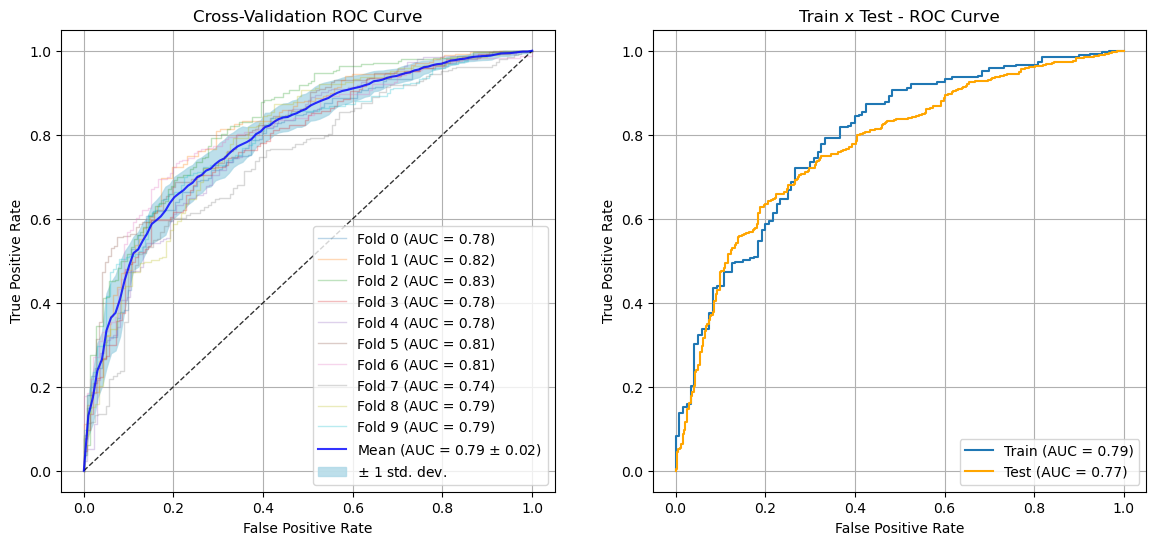

In [19]:
logit_model = LogisticRegression

logit_cv = TrainModelCV(logit_model, X, y)
logit_cv.show_folds_metrics()
print("Metrics Means:")
logit_cv.show_metrics_means()
print("\nBest Model applied to Test Data Set:")
logit_cv.best_model_metrics()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
logit_cv.plot_cv_ROC(ax=ax1)
logit_cv.plot_test_ROC(ax=ax2)

- **Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:**

1. a média e desvio da acurácia dos modelos obtidos;
2. a média e desvio da precisão dos modelos obtidos;
3. a média e desvio da recall dos modelos obtidos;
4. a média e desvio do f1-score dos modelos obtidos.

,accuracy,precision,recall,f1_score
fold,,,,
0,0.738462,0.804428,0.816479,0.810409
1,0.748718,0.826923,0.802239,0.814394
2,0.764103,0.810484,0.817073,0.813765
3,0.730769,0.771536,0.824000,0.796905
4,0.723077,0.764493,0.830709,0.796226
5,0.725641,0.750000,0.839506,0.792233
6,0.748072,0.793522,0.806584,0.800000
7,0.724936,0.793358,0.808271,0.800745
8,0.737789,0.805861,0.817844,0.811808


Metrics Means:
Accuracy Mean: 0.74 +- 0.01
Precision Mean: 0.79 +- 0.02
Recall Mean: 0.82 +- 0.01
F1 Score Mean: 0.80 +- 0.01

Best Model applied to Test Data Set:
Accuracy: 0.7679671457905544
Precision: 0.8066860465116279
Recall: 0.8564814814814815
F1 Score: 0.8308383233532934


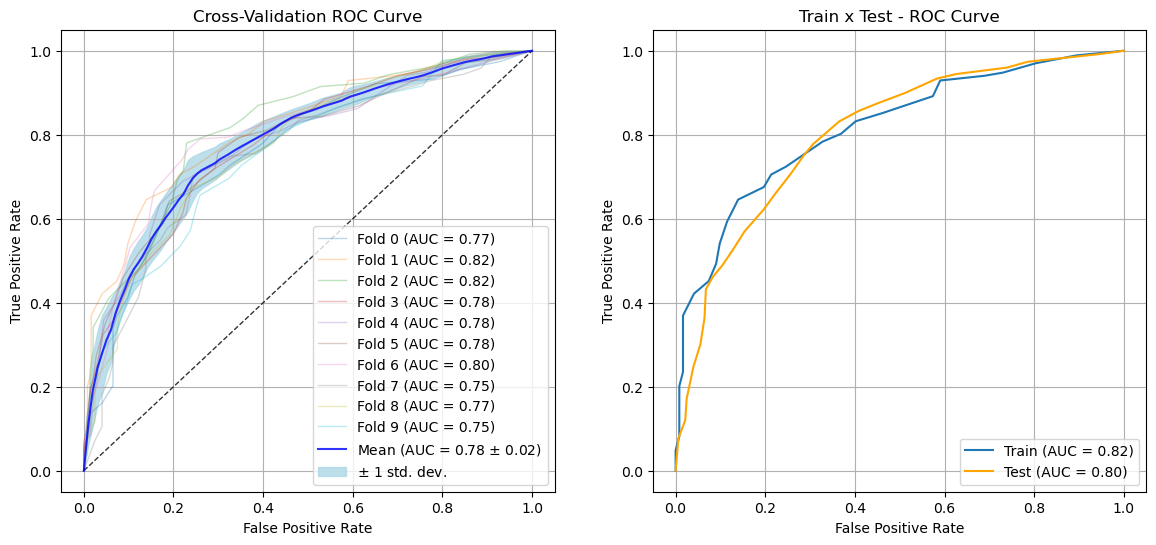

In [20]:
tree_model = DecisionTreeClassifier
tree_settings = {'min_samples_leaf' : 100}

tree_cv = TrainModelCV(tree_model, X, y, **tree_settings)
tree_cv.show_folds_metrics()
print("Metrics Means:")
tree_cv.show_metrics_means()
print("\nBest Model applied to Test Data Set:")
tree_cv.best_model_metrics()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
tree_cv.plot_cv_ROC(ax=ax1)
tree_cv.plot_test_ROC(ax=ax2)

- **Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:**

1. a média e desvio da acurácia dos modelos obtidos;
2. a média e desvio da precisão dos modelos obtidos;
3. a média e desvio da recall dos modelos obtidos;
4. a média e desvio do f1-score dos modelos obtidos.

,accuracy,precision,recall,f1_score
fold,,,,
0,0.792308,0.818493,0.895131,0.855098
1,0.792308,0.825784,0.884328,0.854054
2,0.792308,0.789474,0.914634,0.847458
3,0.771795,0.786477,0.884000,0.832392
4,0.761538,0.778547,0.885827,0.828729
5,0.743590,0.756272,0.868313,0.808429
6,0.773779,0.792453,0.864198,0.826772
7,0.766067,0.804878,0.868421,0.835443
8,0.768638,0.818505,0.855019,0.836364


Metrics Means:
Accuracy Mean: 0.77 +- 0.01
Precision Mean: 0.80 +- 0.02
Recall Mean: 0.88 +- 0.02
F1 Score Mean: 0.84 +- 0.01

Best Model applied to Test Data Set:
Accuracy: 0.7874743326488707
Precision: 0.8024691358024691
Recall: 0.9027777777777778
F1 Score: 0.8496732026143791


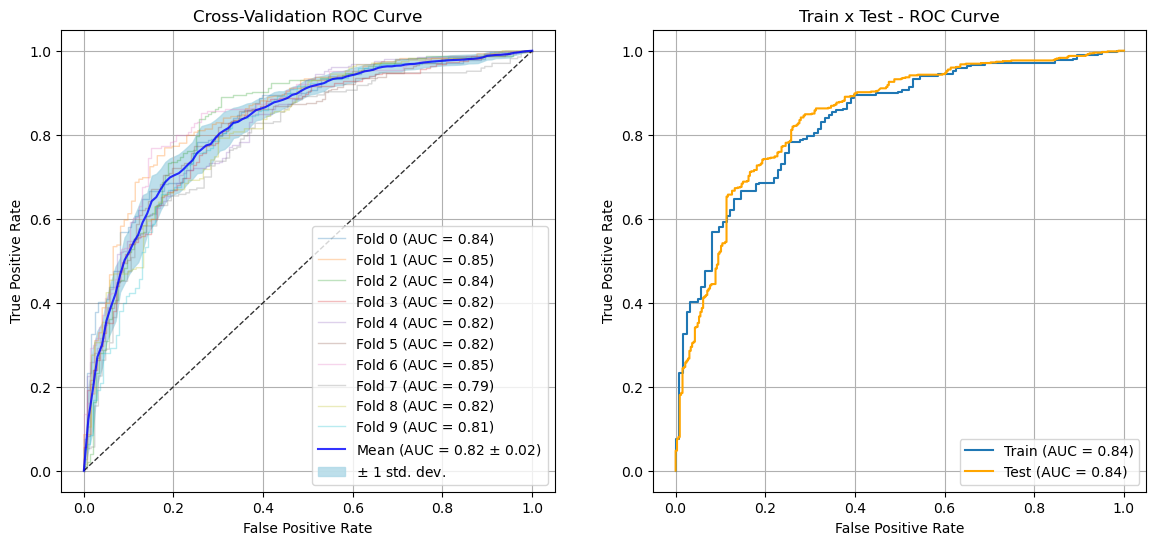

In [21]:
svc_model = SVC
svc_settings = {'probability' : True}

svc_cv = TrainModelCV(svc_model, X, y, **svc_settings)
svc_cv.show_folds_metrics()
print("Metrics Means:")
svc_cv.show_metrics_means()
print("\nBest Model applied to Test Data Set:")
svc_cv.best_model_metrics()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
svc_cv.plot_cv_ROC(ax=ax1)
svc_cv.plot_test_ROC(ax=ax2)

## 5. Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

Resposta: O melhor modelo, dentre os testados, é o Modelo 8: SVC com kernel: 'rbf' e gamma: 2. Pois possui o melhor F1_score aplicado na base de teste e o melhor AUC na curva ROC. (Como podemos ver abaixo)

LogisticRegression | {'solver': 'lbfgs'}
Accuracy: 0.7145790554414785
Precision: 0.7541208791208791
Recall: 0.8472222222222222
F1 Score: 0.7979651162790697

LogisticRegression | {'solver': 'liblinear', 'penalty': 'l1'}
Accuracy: 0.7166324435318275
Precision: 0.7547945205479452
Recall: 0.8503086419753086
F1 Score: 0.7997097242380261

LogisticRegression | {'solver': 'liblinear', 'penalty': 'l2'}
Accuracy: 0.715605749486653
Precision: 0.7551581843191196
Recall: 0.8472222222222222
F1 Score: 0.7985454545454546

DecisionTreeClassifier | {'min_samples_leaf': 50}
Accuracy: 0.7464065708418891
Precision: 0.7835926449787836
Recall: 0.8549382716049383
F1 Score: 0.8177121771217712

DecisionTreeClassifier | {'min_samples_leaf': 100}
Accuracy: 0.7679671457905544
Precision: 0.8066860465116279
Recall: 0.8564814814814815
F1 Score: 0.8308383233532934

DecisionTreeClassifier | {'min_samples_leaf': 150}
Accuracy: 0.7484599589322382
Precision: 0.7874465049928673
Recall: 0.8518518518518519
F1 Score: 0.818383

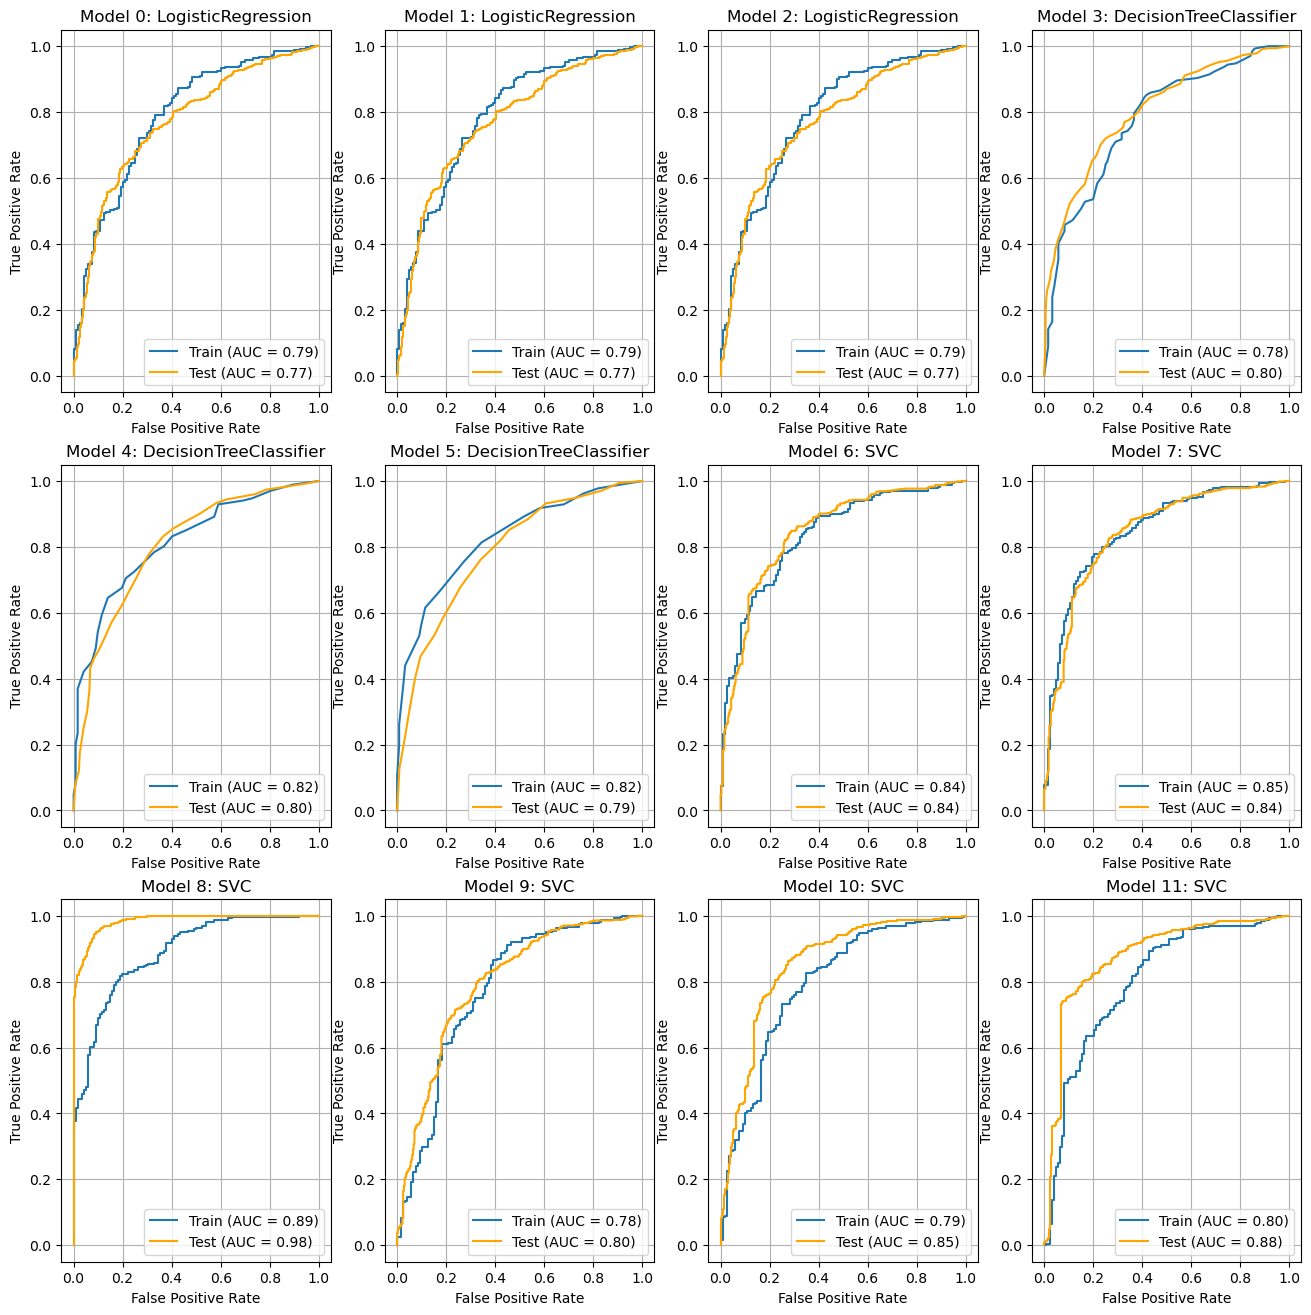

In [22]:
config = [
    (LogisticRegression, {'solver' : 'lbfgs'}),
    (LogisticRegression, {'solver' : 'liblinear', 'penalty' : 'l1'}),
    (LogisticRegression, {'solver' : 'liblinear', 'penalty' : 'l2'}),
    (DecisionTreeClassifier, {'min_samples_leaf': 50}),
    (DecisionTreeClassifier, {'min_samples_leaf': 100}),
    (DecisionTreeClassifier, {'min_samples_leaf': 150}),
    (SVC, {'kernel': 'rbf', 'probability' : True}),
    (SVC, {'kernel': 'rbf', 'gamma': 'auto', 'probability' : True}),
    (SVC, {'kernel': 'rbf', 'gamma': 2, 'probability' : True}),
    (SVC, {'degree': 3, 'kernel': 'poly', 'probability' : True}),
    (SVC, {'degree': 5, 'kernel': 'poly', 'probability' : True}),
    (SVC, {'degree': 10, 'kernel': 'poly', 'probability' : True}),
]

fig, axs = plt.subplots(3, 4, figsize=(16,16))
axs_list = [ax for axs_row in axs for ax in axs_row]

best_f1 = 0
best_model_idx = None
models = []
for idx, ((model_class, settings), ax) in enumerate(zip(config, axs_list)):
    print(model_class.__name__, str(settings), sep=' | ')
    model = TrainModelCV(model_class, X, y, **settings)
    f1 = model.best_model_metrics()
    if f1 > best_f1:
        best_f1 = f1
        best_model_idx = idx
    models.append(model)
    print()
    model.plot_test_ROC(ax=ax)
    ax.set(title=f"Model {idx}: {model_class.__name__}")

In [23]:
best_model_idx

8

## 6. Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

Resposta: Conforme podemos ver abaixo, mesmo o melhor modelo treinado com a base de vinhos brancos não tem uma performance satisfatória quando utilizado na base de vinhos tintos. Isso se deve ao fato de que os vinhos, por pertecerem a categorias diferentes, são analisado e categorizados de acordo com características igualmente distintas.

In [24]:
r_wines = wines[wines.type == 'red'].reset_index().drop(['type', 'quality', 'index'], axis=1)
features = w_wines.columns.drop('opinion')
X = r_wines[features]
y = r_wines.opinion

In [25]:
scaler = models[best_model_idx].best_model_scaler
model = models[best_model_idx].best_model

X_scaled = scaler.transform(X)
y_pred = model.predict(X_scaled)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Modelo treinado e aplicado na base de teste dos Vinhos Brancos:")
models[best_model_idx].best_model_metrics()
print()

print("Modelo aplicado na base de Vinhos Tintos:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Modelo treinado e aplicado na base de teste dos Vinhos Brancos:
Accuracy: 0.9086242299794661
Precision: 0.8823529411764706
Recall: 0.9953703703703703
F1 Score: 0.9354604786076868

Modelo aplicado na base de Vinhos Tintos:
Accuracy: 0.5348399246704332
Precision: 0.5345477386934674
Recall: 1.0
F1 Score: 0.6966844044207942


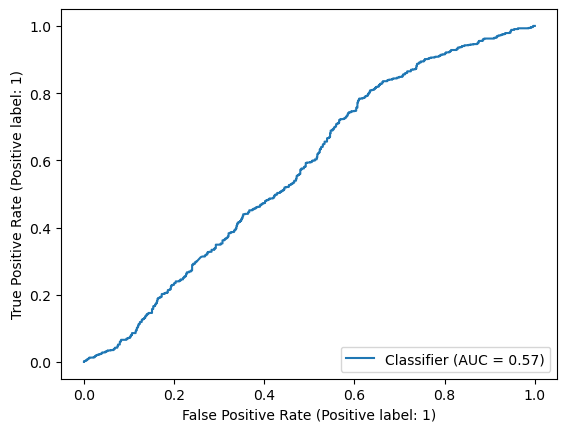

In [26]:
y_score = model.predict_proba(X_scaled)[:,1]
RocCurveDisplay.from_predictions(y, y_score);